In [13]:
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import time
import numpy as np
import sys

import sqlite3 as s3
from datetime import datetime, timedelta

#from multiprocessing import Process, Pool, Queue
import multiprocessing as mp

In [2]:
conn = s3.connect('CTROT')
c = conn.cursor()

### Functions

In [3]:
def getUserTimeline(user,first_date,total_days):
    timeline = np.zeros(total_days)
    c.execute("SELECT * FROM k_values_p2 WHERE user='%s'"%user)
    for instance in c.fetchall():
        #user, date, k_value
        index = datetime.strptime(instance[1],"%Y-%m-%d 00:00:00") - first_date
        index = index.days
        timeline[index] = instance[2]
    return timeline

def getNormalizedUserTimeline(ts,norm):
    #Normalize
    if len(ts)!=len(norm):
        raise ValueError("User time series is not the same length as the normalized time series")
    result = [float(ts[i]-norm[i])/norm[i] for i in range(len(ts))]
    #Truncate by dates
    df_individualuser_spans = df_user_spans.loc[df_user_spans['user_id']==int(user)]
    #Of the format Mon Aug 07 18:54:20 +0000 2017
    start = datetime.strptime(df_individualuser_spans.iloc[0]['first_date'], "%a %b %d %H:%M:%S +0000 %Y")
    end = datetime.strptime(df_individualuser_spans.iloc[0]['last_date'], "%a %b %d %H:%M:%S +0000 %Y")
    return [start - timedelta(days=x) for x in range(0, getAbsoluteDatePosition(start,end)+1)], result[getAbsoluteDatePosition(first_date,start):getAbsoluteDatePosition(first_date,end)]

def getAbsoluteDatePosition(origin,current):
    thing = current - origin
    return thing.days

def movingAverage(ts,bin):
    return [np.mean([ts[i+x]for x in range(bin)]) for i in range(len(ts)-bin)]

## Basics

In [ ]:
c.execute("SELECT DISTINCT user FROM k_values_p2;")
userlist = [thing[0] for thing in c.fetchall()]

In [4]:
with open("userlist_z.txt",'r') as f:
    egolist = [thing.replace("\n","") for thing in f.readlines()]

In [5]:
import pandas as pd
#Get the table of users' personal first and last dates
df_user_spans = pd.read_csv('user_spans.csv')

In [9]:
start_date = datetime.strptime("2009-10-21 00:00:00","%Y-%m-%d 00:00:00") 
end_date = datetime.strptime("2017-10-24 00:00:00","%Y-%m-%d 00:00:00")
total_days = 2925

In [7]:
norm_base = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0245098039215685, 1.0169082125603865, 1.0071684587813621, 1.0172910662824208, 1.0295629820051413, 1.0197368421052631, 1.0200381679389312, 1.0378071833648392, 1.0441458733205373, 1.0360623781676412, 1.0228628230616301, 1.0288844621513944, 1.0262135922330098, 1.0399610136452242, 1.0460176991150443, 1.0426716141001855, 1.0425531914893618, 1.0438898450946643, 1.0582822085889572, 1.0537720706260032, 1.0385232744783306, 1.0458199356913183, 1.0456621004566211, 1.0458135860979463, 1.0367762128325508, 1.027336860670194, 1.0479338842975208, 1.0231164383561644, 1.0443478260869565, 1.030852994555354, 1.0469565217391303, 1.0483592400690847, 1.0206270627062706, 1.0281456953642385, 1.0314625850340136, 1.0336283185840709, 1.0271739130434783, 1.0099601593625498, 1.0197916666666667, 1.0196936542669583, 1.0289156626506024, 1.0261904761904761, 1.0118764845605701, 1.0220417633410672, 1.0458422174840085, 1.0328685258964143, 1.0408560311284047, 1.0491329479768785, 1.0446265938069217, 1.0456171735241502, 1.037037037037037, 1.0419354838709678, 1.0480916030534351, 1.0353460972017674, 1.0214592274678111, 1.0374293785310735, 1.0438931297709924, 1.0520334928229664, 1.047645125958379, 1.0547128927410618, 1.0576307363927429, 1.0738993710691824, 1.0742031872509961, 1.0628803245436105, 1.0661375661375661, 1.0569832402234638, 1.0594285714285714, 1.0492880613362541, 1.0559782608695651, 1.0592391304347826, 1.0596133190118153, 1.0568862275449102, 1.0524752475247525, 1.0526315789473684, 1.0602345415778252, 1.0509309967141292, 1.0500568828213879, 1.0437219730941705, 1.0371900826446281, 1.0305105853051058, 1.0340346534653466, 1.0371498172959805, 1.0354191263282173, 1.0438908659549229, 1.0584763948497855, 1.0539460539460539, 1.0432558139534884, 1.0451230628988148, 1.0489228007181328, 1.0571043165467626, 1.0531634446397189, 1.0421455938697317, 1.0401174168297456, 1.0438066465256797, 1.0487179487179488, 1.0446985446985446, 1.0439049586776858, 1.0595238095238095, 1.0462398373983739, 1.0483706720977597, 1.0562130177514792, 1.0520534861509074, 1.0465004793863855, 1.0494665373423859, 1.048582995951417, 1.0419479267116682, 1.0504451038575668, 1.0287769784172662, 1.04375, 1.0279241306638567, 1.0467289719626167, 1.0348468848996832, 1.0221483942414176, 1.0338600451467268, 1.0332963374028856, 1.0375536480686696, 1.037706611570248, 1.0335497835497836, 1.0381263616557734, 1.0352877307274702, 1.0289617486338798, 1.0344243792325056, 1.0235162374020157, 1.0304948216340621, 1.0412004069175993, 1.0538384845463609, 1.0565764023210831, 1.0646551724137931, 1.0471877979027646, 1.0498046875, 1.0431976166832175, 1.0420168067226891, 1.0316004077471967, 1.0455455455455456, 1.0535353535353535, 1.054994954591322, 1.0545361875637105, 1.0538922155688624, 1.0483711747285291, 1.0554994954591321, 1.0575129533678755, 1.0536082474226804, 1.0615079365079365, 1.0542883211678833, 1.0599284436493739, 1.0580035971223021, 1.0561268209083119, 1.0517666392769105, 1.0524034672970843, 1.0511319281811085, 1.0447882736156351, 1.0531739488870568, 1.0464547677261613, 1.0431323283082077, 1.0431623931623932, 1.0516074450084603, 1.0405737704918032, 1.0511779041429732, 1.0548334687246141, 1.0462218649517685, 1.0518638573743921, 1.0455645161290323, 1.0536006546644845, 1.0586003372681281, 1.0623931623931624, 1.0637296834901626, 1.0682593856655289, 1.0710180623973728, 1.0634206219312603, 1.0600165562913908, 1.0710862619808306, 1.0471311475409837, 1.0515075376884422, 1.0464135021097047, 1.0481712756467441, 1.047982062780269, 1.0580110497237569, 1.0714957666980245, 1.0577451879010082, 1.0544642857142856, 1.0688372093023255, 1.0515653775322285, 1.0693430656934306, 1.0606617647058822, 1.0634920634920635, 1.0563770794824399, 1.0456707897240722, 1.0449859418931584, 1.0432737535277516, 1.0394736842105263, 1.0564292321924145, 1.0521500457456541, 1.063922942206655, 1.0621805792163543, 1.065800162469537, 1.0795715378729915, 1.0708426547352723, 1.0659824046920821, 1.083453237410072, 1.0726141078838174, 1.0725530458590007, 1.0808973487423521, 1.0795065113091158, 1.0837837837837838, 1.0834473324213407, 1.0763513513513514, 1.0709318497913769, 1.070054945054945, 1.0676532769556026, 1.0770338372930166, 1.0725053840631731, 1.0632551528073917, 1.0614035087719298, 1.072646404744255, 1.0616438356164384, 1.0669230769230769, 1.0657596371882085, 1.0616641901931649, 1.0472324723247233, 1.0533333333333332, 1.0570809248554913, 1.0538020086083213, 1.0578279266572637, 1.0456781447645818, 1.0611384399156711, 1.0548736462093862, 1.0590747330960855, 1.0561633843909555, 1.0596026490066226, 1.0571858540255832, 1.0520754716981131, 1.0419790104947526, 1.0489168413696714, 1.0334224598930482, 1.0496644295302013, 1.0601454064771976, 1.0631921824104233, 1.0719602977667493, 1.0712921705919796, 1.063843648208469, 1.0561872909698997, 1.0486666666666666, 1.070054945054945, 1.0718194254445965, 1.0658073270013568, 1.0650887573964498, 1.0472074468085106, 1.0792349726775956, 1.0635135135135134, 1.0565656565656565, 1.0632653061224491, 1.0467091295116773, 1.0631808278867103, 1.0592538405267009, 1.0536113179448994, 1.042316258351893, 1.0456217807211186, 1.0554339897884755, 1.0633903133903133, 1.0584996558843771, 1.0580774365821095, 1.0651315789473683, 1.0806045340050379, 1.0691358024691358, 1.0776119402985074, 1.081547619047619, 1.075609756097561, 1.0770178681454097, 1.0727048675292667, 1.059047619047619, 1.0614990390775143, 1.0697224015493867, 1.0709309689677011, 1.0643594414086217, 1.0624242424242425, 1.0815347721822541, 1.0635014836795251, 1.0588928150765606, 1.0495226730310263, 1.0581818181818181, 1.0630068621334996, 1.0592592592592593, 1.053627760252366, 1.0467050543825975, 1.0553111250785669, 1.0576424870466321, 1.0611038107752957, 1.0673015873015872, 1.0512820512820513, 1.0575139146567718, 1.0499390986601704, 1.050093926111459, 1.0543150271575137, 1.0505350772889417, 1.0556192660550459, 1.0638176638176637, 1.0719101123595505, 1.0661886376172089, 1.0782092772384035, 1.0666311300639659, 1.0701381509032943, 1.0773841961852861, 1.0669226549643445, 1.0642659279778393, 1.0604703247480403, 1.0756816917084029, 1.063937184520471, 1.0573144104803494, 1.0524017467248907, 1.0675603217158176, 1.0748945147679325, 1.075207468879668, 1.059670781893004, 1.0592105263157894, 1.0654062340316812, 1.0605, 1.066465256797583, 1.0527116066903193, 1.0618975139523086, 1.0629089079013587, 1.0631364562118126, 1.0609631147540983, 1.0540682414698164, 1.0738219895287957, 1.06478578892372, 1.0669831223628692, 1.0719616204690832, 1.0701284796573876, 1.0674455655868296, 1.0565059616381545, 1.0651041666666667, 1.0548523206751055, 1.0683850604944767, 1.0678756476683937, 1.060030785017958, 1.0680548501777551, 1.0500526870389884, 1.0688575899843507, 1.0661803022407503, 1.0581574884199691, 1.0598555211558307, 1.0567010309278351, 1.0716827656329435, 1.0669665167416291, 1.0637132901941264, 1.0786852589641434, 1.0677212061295107, 1.0704780680138, 1.0744320927984534, 1.0806608357628766, 1.085338175215615, 1.088567555354722, 1.0919591292758775, 1.0887996430165106, 1.0783964365256125, 1.0800351802990324, 1.0802983764809126, 1.0693160813308689, 1.0743305632502309, 1.071559633027523, 1.0673791821561338, 1.0534208059981256, 1.0568127106403467, 1.0633156114064766, 1.0638712823013163, 1.0618004866180049, 1.0585027268220129, 1.086829268292683, 1.0685990338164251, 1.0685255198487713, 1.073583180987203, 1.0662100456621004, 1.0563063063063063, 1.0844243792325057, 1.0804242156429518, 1.0700995240155777, 1.0847671002937473, 1.0882852292020373, 1.0822492656315568, 1.0921105326391669, 1.1025137470542026, 1.1090121999212907, 1.1047140649149922, 1.0959874114870181, 1.1208791208791209, 1.0982211910286157, 1.1242469879518073, 1.1204379562043796, 1.1325771003190359, 1.116494478090488, 1.117687781239183, 1.1161911309728429, 1.126452041154995, 1.1102765448958689, 1.1052631578947369, 1.1069537592657959, 1.1008976660682226, 1.0921489126428308, 1.0832727272727272, 1.0940236010658546, 1.0951519536903038, 1.1027346637102735, 1.0962877030162412, 1.0977443609022557, 1.0850975508509755, 1.101650738488271, 1.1020861074123391, 1.090124640460211, 1.081384015594542, 1.0958772770853307, 1.0973963355834138, 1.0920991117344554, 1.0911151405258386, 1.1016873889875667, 1.0785525154457194, 1.091060985797828, 1.1010220125786163, 1.1030814380044021, 1.1097690941385434, 1.1132139236228455, 1.1224899598393574, 1.1271944352434582, 1.1159128978224455, 1.1061702861082385, 1.0898796886058033, 1.0854486950303897, 1.0857461024498887, 1.075536809815951, 1.0720124562086415, 1.0692640692640694, 1.0649300155520995, 1.0653013910355487, 1.0755504935459377, 1.0830540037243948, 1.087634222376169, 1.0926506443747823, 1.1193693693693694, 1.1182128451753026, 1.1305925030229746, 1.1522767593140153, 1.1543389633080956, 1.1600801832760597, 1.178250204415372, 1.1689795918367347, 1.1723386877212087, 1.1658197378978337, 1.1617572371762317, 1.1589137540859944, 1.1592213626154231, 1.1481575603557814, 1.1544694859458091, 1.1501367138951031, 1.141996989463121, 1.1406727828746177, 1.1361053719008265, 1.1377040547656661, 1.14282011404873, 1.1268087345435411, 1.1341979883536262, 1.1441013460015836, 1.1457828078684991, 1.1465403841094448, 1.1604193971166448, 1.1499999999999999, 1.162082777036048, 1.1440929981075967, 1.1400109170305677, 1.1492253329709161, 1.1327361563517915, 1.1263073209975865, 1.1215854311730049, 1.1320450885668276, 1.1342727997872906, 1.1304687499999999, 1.1176317162232656, 1.1253196930946292, 1.128412537917088, 1.138671875, 1.1327894856106957, 1.1443592552026287, 1.1535660741058043, 1.1606992417860151, 1.1661770877045741, 1.1569816053511706, 1.174553101997897, 1.1485979244866416, 1.1409472014502606, 1.1396200503547722, 1.1412352406902815, 1.1384820239680427, 1.1420357751277683, 1.1379533678756477, 1.1394261424017003, 1.1301099813239261, 1.1295454545454546, 1.1401538781451446, 1.1242366814066118, 1.1255374032674119, 1.1207337883959045, 1.1180904522613064, 1.118474323460473, 1.1271095919675282, 1.1145439260193359, 1.1215993404781532, 1.1203085904920767, 1.1217118997912316, 1.1301311891663139, 1.1281889099725912, 1.1279218019549511, 1.1303332625769476, 1.1257031588057118, 1.1244368161338769, 1.120374308804764, 1.1200845665961945, 1.1214893617021278, 1.1258023106546855, 1.1104294478527608, 1.1094164456233422, 1.1135458167330676, 1.1032790542047737, 1.104007412555015, 1.1003814973772055, 1.1060062215841111, 1.0995628946090334, 1.1069651741293531, 1.0941265060240963, 1.1056213763549281, 1.111304780876494, 1.1096056133559158, 1.1121986154213417, 1.1554818571985954, 1.1670411985018727, 1.1747352496217851, 1.1695928277923049, 1.1678598342125095, 1.166603559257857, 1.1605881229711668, 1.1240842490842491, 1.1104122990915444, 1.1020121665886757, 1.1149155722326454, 1.1126995472956873, 1.1085145765849145, 1.1161825726141079, 1.1093714022565047, 1.1165430954587581, 1.1153578874218206, 1.1106941838649156, 1.1150622876557192, 1.1234987536823022, 1.1210191082802548, 1.1257257704332291, 1.1235581188997339, 1.1185911725367812, 1.1191546762589928, 1.1182378452408126, 1.1088607594936708, 1.1123932610200784, 1.1157179667369408, 1.0955550273353933, 1.1035598705501619, 1.1112390603408568, 1.1124856815578466, 1.1069543263713564, 1.1063343242625201, 1.1152281970176232, 1.1101977338369251, 1.110791048083315, 1.1180434782608695, 1.1016357688113414, 1.1147324377890333, 1.1278738778191373, 1.1210492367232854, 1.118600129617628, 1.095730633802817, 1.110816191108162, 1.1065284516982796, 1.1050066459902526, 1.1104847801578355, 1.1108289078734703, 1.0947834187238006, 1.1073714150272576, 1.0966113914924298, 1.0950095969289828, 1.1002341920374707, 1.1033513006796345, 1.1012747875354107, 1.0950058072009292, 1.1022701730726006, 1.1021930816188108, 1.0981651376146788, 1.0827346465816918, 1.082925692988586, 1.0896248263084762, 1.0887356321839081, 1.098360655737705, 1.1006844778096709, 1.1169627749576989, 1.121060321436026, 1.1216520139030872, 1.1231201122919592, 1.1223686799134369, 1.1267578501252167, 1.1147919876733436, 1.110120816003169, 1.1144446652096165, 1.1146917534027221, 1.1102123356926188, 1.1246973365617434, 1.1253306205493387, 1.116165718927701, 1.1247011952191235, 1.1358240902899397, 1.1342281879194631, 1.1347817727360123, 1.1275775679321642, 1.1346788278672617, 1.1380825057295645, 1.1260712245286613, 1.1324811156304475, 1.1260074700216238, 1.1308008615625611, 1.1282360024081879, 1.1204188481675392, 1.1259379436219834, 1.1249487074271645, 1.1302401302401301, 1.1315315315315315, 1.1299500192233756, 1.1470640411566435, 1.1535148173673329, 1.1496036431101366, 1.1493333333333333, 1.1488458927359131, 1.1490335707019328, 1.1432530746578902, 1.1314149560117301, 1.1227640745622294, 1.1080977845683728, 1.1147696992767415, 1.1163981042654028, 1.1190657045195593, 1.1233546446032343, 1.1153013352580297, 1.1209121442460668, 1.1310321140305684, 1.1363092184025996, 1.1324447443900794, 1.1436896436896438, 1.1354795439302481, 1.1310991491578399, 1.131578947368421, 1.125295078990376, 1.1153630763487026, 1.1160241874527588, 1.111219702892885, 1.1127207779321293, 1.1123843988741455, 1.1170917854990963, 1.1172754195459031, 1.1308590013392004, 1.1211888782358581, 1.1449990510533308, 1.1196581196581197, 1.1264450867052023, 1.1354688618468145, 1.1221621621621622, 1.1204178885630498, 1.1215121512151216, 1.1264553107648219, 1.1254007837548985, 1.1343044945816307, 1.123278116826504, 1.1347699675047032, 1.1452045606975185, 1.145369284876905, 1.1550766122242802, 1.1524798927613942, 1.1594349142280524, 1.1519030551288616, 1.1499397486658633, 1.1347222222222222, 1.1442871936486021, 1.1503026227303295, 1.1531486146095717, 1.1489467573395256, 1.1600957701516361, 1.1667670985236518, 1.1706845238095238, 1.1605065527904579, 1.156305770374777, 1.1547725245316682, 1.1625389292599733, 1.1542600896860986, 1.1381599747075561, 1.1443712863337081, 1.1393650793650794, 1.1524621212121211, 1.1596887159533074, 1.1480666457088966, 1.1491363355953115, 1.156900944103102, 1.1558479964512791, 1.1483260771655908, 1.1422562715938109, 1.1437819933754894, 1.1499624342599548, 1.1438935912938331, 1.1450753539351499, 1.1404769183735861, 1.1439659108202709, 1.1424177176253461, 1.145549256932741, 1.132303966091432, 1.124922311995028, 1.1342745098039215, 1.1287628053585501, 1.1265286923800564, 1.1331259720062208, 1.1304893350062735, 1.1374452097683156, 1.1408690273697233, 1.137305307727204, 1.1420903533621589, 1.1374795417348609, 1.1425595238095239, 1.1448674270478447, 1.1348462664714496, 1.1458302799355122, 1.1413705961052476, 1.1473448017950636, 1.1504650465046504, 1.152542372881356, 1.1471703617269544, 1.1373690337601863, 1.144079885877318, 1.1367484574544411, 1.1363040629095675, 1.1324879755137736, 1.1367346938775511, 1.1360082608054285, 1.1306206693203598, 1.1326709526592635, 1.1303851640513551, 1.133565945568737, 1.1352577319587629, 1.1323287671232876, 1.1348755411255411, 1.132573726541555, 1.1270502823339608, 1.12435444414243, 1.1347178576308239, 1.1380254689853484, 1.1401907356948229, 1.1395476353666896, 1.1455933379597503, 1.1450349650349649, 1.1507726576639288, 1.1551048005409059, 1.1595600217273221, 1.1542699724517906, 1.1612032915149062, 1.1624616206114002, 1.1585068974844468, 1.1536585365853658, 1.1490112994350283, 1.146195497292676, 1.1389850057670128, 1.1271882261812549, 1.1300601528206795, 1.1211726384364822, 1.1158256880733946, 1.1262009444715844, 1.1420193374544301, 1.1415518042434567, 1.1462875662934591, 1.148478414720453, 1.1662870159453302, 1.1689366160293346, 1.160164271047228, 1.1594756268295787, 1.1800441826215022, 1.1789823271260824, 1.1902675276752768, 1.1757221458046767, 1.1831869510664994, 1.1770997523080386, 1.1868823000898472, 1.1738835500282645, 1.1748989672204759, 1.1902625084137313, 1.187978979636523, 1.1917486105173152, 1.1984845295727216, 1.2007865866280274, 1.206740649404028, 1.2138787138787139, 1.2109572424946933, 1.2180466237942122, 1.212511406265842, 1.2204873197414221, 1.2123021797551508, 1.2020989505247377, 1.1891282051282051, 1.1882352941176471, 1.1614622189065331, 1.1638159991501116, 1.1537446387330914, 1.1623355081278337, 1.1545167265991065, 1.1713724273451236, 1.1720891306622032, 1.1737221699592348, 1.1756261133815362, 1.1845112145577656, 1.1743002544529262, 1.179639470667917, 1.1712328767123288, 1.1790616022981169, 1.1707188160676534, 1.1764643799472296, 1.1754939050021018, 1.1698329853862213, 1.1648741664874167, 1.1573268743807112, 1.1512260068789526, 1.1550695825049702, 1.1668110918544194, 1.1627453106364523, 1.1676198856137263, 1.1670667830641641, 1.1686695278969956, 1.17184, 1.1798874376128279, 1.1829229631195182, 1.1733996270975762, 1.1847352970948477, 1.1838838838838839, 1.1857802771640891, 1.1910903859509872, 1.1903400689995072, 1.1853533359652586, 1.184853665895605, 1.1773092982992157, 1.1828954147346729, 1.171315157212995, 1.1800847457627119, 1.1710667525220004, 1.1715932131042579, 1.1682381608221211, 1.1732741304577652, 1.1670707283651311, 1.1652823046998213, 1.1691320988931415, 1.1684350132625996, 1.1688047240887802, 1.171801673127933, 1.1728769059880844, 1.1797673952275918, 1.1845721737385897, 1.183825005017058, 1.1773021001615509, 1.1851888866679992, 1.1888412017167382, 1.1790716286514606, 1.1743825617438257, 1.175009972078181, 1.1683602311217374, 1.1668177697189483, 1.1711840228245365, 1.1671120246659814, 1.1731463339177064, 1.1716301753657776, 1.1697679280786117, 1.1659188145674633, 1.1685082872928176, 1.1752793296089385, 1.170447877958146, 1.1816773193879528, 1.1757610568638714, 1.1777168258772344, 1.1777964833520389, 1.1819878674755016, 1.1780809031044215, 1.1694296150604102, 1.1715061820906707, 1.1731321173965374, 1.1692677070828332, 1.1736181134842791, 1.1701625351856897, 1.1675131507346272, 1.1695742565307783, 1.1708063354931606, 1.1691276383730411, 1.1717474142623843, 1.1762459076027647, 1.1667275050191641, 1.1715677265208602, 1.1686281721221037, 1.1661767407679589, 1.16993583868011, 1.1664120765567436, 1.1669214857451209, 1.1697994423958988, 1.1763615500044136, 1.1714764804518578, 1.1728721063286682, 1.1819699499165275, 1.1795907377490575, 1.1724106739032112, 1.1744875943905071, 1.1706635412910205, 1.1659551276228541, 1.1732939279957013, 1.1750111957008509, 1.1747891699955615, 1.177568463282749, 1.1768308688424185, 1.1733811063532291, 1.1742844561867019, 1.1740289752022042, 1.1713534107402033, 1.1780410022779044, 1.1724456773000462, 1.1755592225889255, 1.1826062897722032, 1.1821832785688207, 1.1730527073214607, 1.1795987215909092, 1.1817457507082152, 1.1836197825324448, 1.1905739457702507, 1.2052805840903302, 1.1943923640702232, 1.1932157163555783, 1.2000500542254109, 1.1978971391311435, 1.1898989898989898, 1.1867158671586715, 1.1731149160355614, 1.1752136752136753, 1.179445483372632, 1.1710849288168876, 1.1752415558675366, 1.1738619183604906, 1.1789456178280393, 1.179454820797577, 1.176747311827957, 1.1823835938813245, 1.1833825390130746, 1.1770379854886897, 1.1780400205233452, 1.1700429184549357, 1.1901122133680273, 1.1862986692952193, 1.190684253915911, 1.1933692765751991, 1.2085319351763584, 1.2164705882352942, 1.2297582727059375, 1.2016527586486268, 1.1979819350638783, 1.2022903885480574, 1.2023246160232461, 1.1873165002935995, 1.1937420718816067, 1.1871082500423513, 1.1900058592115175, 1.189166735897649, 1.1863461065069336, 1.182215262897643, 1.1923867466907836, 1.184640657084189, 1.1871268504130204, 1.1930762272839404, 1.1916497770571544, 1.2018874011937408, 1.2089527987651312, 1.2037763021041683, 1.2032682343563172, 1.212876755562569, 1.2009316279804201, 1.1946923255994413, 1.2046171604463256, 1.1994896775690096, 1.195618516798266, 1.1921454322313416, 1.1995680012342822, 1.2015539305301646, 1.2050660620748963, 1.1930840244093257, 1.198418183214313, 1.2106308232778371, 1.2253929497939875, 1.210546398046398, 1.2133159469203036, 1.2139851579833218, 1.2391432791728212, 1.2375467895191476, 1.2361051271003878, 1.2281355203781965, 1.2353943352026691, 1.2400782560089436, 1.2368292512734631, 1.2253541382037823, 1.2191069574247144, 1.2141313259297906, 1.2116923532898636, 1.2165652367522637, 1.2050625282507157, 1.204583270307064, 1.2040249305399113, 1.210541989279333, 1.2070883072588419, 1.217008797653959, 1.2290306378704168, 1.2554642906863427, 1.2808034510649771, 1.277252931323283, 1.2801154284947318, 1.2863090042301752, 1.2875194269883101, 1.2927797591010026, 1.2993179082519728, 1.3021311033180469, 1.2945894507884721, 1.2977426485364056, 1.2971569345495706, 1.3026324341891453, 1.3031370038412291, 1.2948882609812484, 1.2954310121667099, 1.2971625766871167, 1.3025902175279769, 1.3088873514057489, 1.3169014084507042, 1.3049595721652767, 1.2938746530691281, 1.2836879432624113, 1.2839481946624804, 1.2794681836221722, 1.2753699440973365, 1.2732903225806451, 1.2686866076619936, 1.2724523932063818, 1.2712029004272951, 1.2688438928804702, 1.2678418733144774, 1.2627795000329793, 1.2457759381149487, 1.2587162162162162, 1.3481955905899741, 1.3546172539489671, 1.3537259615384616, 1.369903144804496, 1.3723297236522871, 1.3848150551589877, 1.3799165147862895, 1.2956941445446462, 1.3698654601738303, 1.3725023786869648, 1.3706845764109814, 1.3749852018468096, 1.3796422034598808, 1.5097526424757546, 1.5173510076516865, 1.4524403080161763, 1.4582740116088051, 1.4575732675979183, 1.4675101865751663, 1.5752399135808672, 1.4898089171974522, 1.5004486671945105, 1.5379539695945945, 1.5802353431219411, 1.6166072338257769, 1.6540227590337393, 1.568567584351066, 1.5794848111658457, 1.588064120890341, 1.5900862286319399, 1.5910450737933786, 1.5896893003102073, 1.605679156908665, 1.6733991064780342, 1.7495842341593215, 1.7489152444315881, 1.7391607817375596, 1.7210783709365882, 1.6864389190984186, 1.6410441120386456, 1.554003224073079, 1.463319069959272, 1.4539193009509124, 1.4490657332578369, 1.4374549572737567, 1.4355562353421025, 1.4325220674524211, 1.4240587600801273, 1.4011788639090292, 1.3698024809668317, 1.3477637456570892, 1.3253357307411362, 1.3055844606312867, 1.2879667076959147, 1.2828671121887751, 1.2720142602495543, 1.2793109509579892, 1.2855003168385275, 1.2878343399482313, 1.2881210245831185, 1.2971467161911194, 1.3021366570220343, 1.3067484662576687, 1.3011020656808994, 1.3022029854059154, 1.2961081020715841, 1.2973682740124044, 1.286359785371364, 1.2811627244229125, 1.2806506849315069, 1.2722585080783775, 1.2885839189862209, 1.2990649154099778, 1.3115907016696193, 1.3291945240369309, 1.3360435035109022, 1.3396355954581463, 1.3457643211309209, 1.3387653788042304, 1.3242625327608319, 1.3160025084088707, 1.301316944688323, 1.2780866271610971, 1.254466006939982, 1.2441945571894337, 1.237860757762276, 1.2475341170112146, 1.2453386988598256, 1.2552702436461549, 1.2756670902160101, 1.2985712541213823, 1.3085256712199718, 1.3100608872136852, 1.3081372271051885, 1.3141283393004681, 1.3127556306920434, 1.3129551050343129, 1.3133438630458043, 1.3160090474993718, 1.3208955223880596, 1.3175427102756641, 1.3114228456913828, 1.314759186943026, 1.3073366527791892, 1.3155941214826705, 1.3235515425131679, 1.3201000000000001, 1.3264176350306718, 1.3208021309745188, 1.3226669308500099, 1.3136913352908974, 1.3007696564213491, 1.3016446865930038, 1.3004232750267735, 1.2950643776824033, 1.2869739068026862, 1.2781853181416158, 1.2756317315658658, 1.2709364740215749, 1.2686713938201957, 1.2706490819756917, 1.2641801839032958, 1.2634844134536505, 1.2771049316926655, 1.2795641387361969, 1.283622793167791, 1.2726269315673289, 1.286366695510047, 1.2827250373656043, 1.280365609267315, 1.2659855647046865, 1.2648245260185558, 1.3015508901411261, 1.2902386551258318, 1.293920607939206, 1.2919959979989994, 1.2870568345681468, 1.2688496117695136, 1.2621703593276101, 1.2294233744065717, 1.2297833547833548, 1.2225549989109126, 1.22302079930306, 1.220302613480055, 1.2298985584623598, 1.2344026133990254, 1.2312731568490576, 1.2393694031851574, 1.2456149732620321, 1.2470329198217067, 1.2490704316430457, 1.2407993338884262, 1.2437348867883051, 1.2621229170015538, 1.3415100992293356, 1.3414828859395269, 1.3397639357270383, 1.3428543287698218, 1.3443973290442073, 1.3429916521063872, 1.3237841761432374, 1.252895164567249, 1.2429641105086495, 1.2324466439839159, 1.2397355066892204, 1.2423931448509415, 1.240306489766533, 1.2365253793825222, 1.2332084630401519, 1.2278989667049369, 1.2257187663355986, 1.2304388325398468, 1.2321053440590255, 1.2331294597349642, 1.2302905631267678, 1.2193293277871926, 1.2214233991931314, 1.2200113995543811, 1.2187467362924282, 1.2113953244574902, 1.2143423347249378, 1.2255938055875275, 1.2179600311445626, 1.2160008226644043, 1.2096724351050681, 1.2121431901776927, 1.2130524152106885, 1.2205562028266046, 1.2136110685658856, 1.2251958888775822, 1.2399799849887416, 1.2432378778103133, 1.248731714524947, 1.2663198837808707, 1.2745079879601759, 1.2933974242699076, 1.3017249083921709, 1.3455658783783784, 1.3842751842751844, 1.3927794871794872, 1.3847652115001905, 1.3698279175028822, 1.3591357971451981, 1.3554590840026048, 1.3001558774986246, 1.2689824629022932, 1.2579960441893001, 1.2509686168151879, 1.2547064801819678, 1.2504275592474958, 1.2397709885987858, 1.2348758012820513, 1.2376970734901527, 1.2392455494477785, 1.2376137512639029, 1.2353029922051797, 1.2587611661922058, 1.2609591056192997, 1.2679451260747754, 1.2818499545171638, 1.2869143625192012, 1.2875776397515528, 1.3021155217494651, 1.2934882151636382, 1.2922482492151655, 1.2959099107882806, 1.2839704308919366, 1.2922125359177909, 1.2957502168256723, 1.2859794403198173, 1.284362879576199, 1.2829817158931083, 1.284445890665675, 1.2860654977270618, 1.2809415689727075, 1.2728122662677637, 1.25621387283237, 1.2529628910044686, 1.2340747983378146, 1.2351840913565661, 1.2318740777176587, 1.2236757664017377, 1.2273066401392689, 1.2357775590551181, 1.2338769642591583, 1.2414183141536344, 1.2606984990528003, 1.2597218833861918, 1.268926941759482, 1.2739202014332753, 1.2826398852223817, 1.2946898496240602, 1.2839425890659111, 1.2784851605654901, 1.2710712600283152, 1.2662735738686883, 1.2591896211337783, 1.2450296559905101, 1.2501543283156844, 1.2444848542853042, 1.2477462594987492, 1.251494469286891, 1.2578413721216715, 1.2639700724807108, 1.2686268114253763, 1.2761631936422861, 1.2779450595265669, 1.2735725018782871, 1.2690031006295217, 1.2640376198901202, 1.2643516565912181, 1.2666351829988194, 1.2641473513873684, 1.2695656333716034, 1.2632114313393072, 1.2701729106628241, 1.2748010610079576, 1.2700607684578209, 1.2667437045596803, 1.2529486927462159, 1.2526183087664857, 1.2586007516623301, 1.2585758334939294, 1.2919565316236985, 1.3050778050778051, 1.3125564997288013, 1.3209048640915593, 1.3228452939055175, 1.3268908704114426, 1.3321719457013574, 1.299470134874759, 1.2965530521856345, 1.293941298776655, 1.2850385253096654, 1.2777123798312733, 1.2714764769701155, 1.2631735783461635, 1.2612443962756785, 1.2523686047671287, 1.2518879173290938, 1.2485870104115022, 1.2487785422275401, 1.2451034413665281, 1.2414868467380917, 1.2442232492001422, 1.2377404704801755, 1.2331728306525971, 1.2234567901234568, 1.2228702993092864, 1.2163388033839568, 1.2220634758648841, 1.2208970438328237, 1.2214102111788721, 1.2295838980073281, 1.2274418373927278, 1.2351178781925345, 1.234230731849548, 1.2410357606969245, 1.2365850137157708, 1.2358776787864194, 1.2354987846146515, 1.2393394250904246, 1.2380114176974311, 1.239524055871702, 1.2426847024564369, 1.2439822388408506, 1.248207263474439, 1.2644776119402985, 1.2709694989106755, 1.2759302534603632, 1.2759455099480193, 1.2786067455412327, 1.2807853769459507, 1.2895656733374115, 1.2930951018791532, 1.295804380332483, 1.2954585615833185, 1.30276616561416, 1.2914146987419997, 1.2947331398927284, 1.2965202909983347, 1.2881289819269275, 1.3036759442502843, 1.2933232994690413, 1.2901426174496644, 1.2797488622956346, 1.2806193093609701, 1.2675486186461897, 1.2729637866644288, 1.244258872651357, 1.2452663635962395, 1.2476711844951658, 1.2455725565419102, 1.2507825775869779, 1.2463624039765024, 1.2510999228920034, 1.2928903654485049, 1.3024215007982969, 1.2967037822552139, 1.2929840807867001, 1.2959458862018658, 1.2977230606301298, 1.3196524865188737, 1.3028682337718351, 1.3170700636942676, 1.322140252692275, 1.3276586801176966, 1.3402557245528999, 1.3441506912249928, 1.3331349375053141, 1.3166723578623869, 1.3095299698145753, 1.3018835095045456, 1.3116307371349096, 1.312963525176736, 1.3119961861835832, 1.3057042161597703, 1.3046715137794418, 1.3037898102934187, 1.3004739748662868, 1.3039676324719394, 1.2880084708373776, 1.2833886308338862, 1.2790821298839372, 1.2700302007461362, 1.2636408397117407, 1.2591253904506916, 1.2595328142380422, 1.2606605812056269, 1.2584501780141533, 1.2584220248042923, 1.2583387835186397, 1.2631126027279378, 1.2630204989943081, 1.2638244890949681, 1.2699893048128341, 1.2664208540559081, 1.2697690102849435, 1.2681253399154917, 1.2723081436774384, 1.2794504530838935, 1.2800033244680851, 1.2775175158575516, 1.2777937492299478, 1.2778726417058848, 1.2750565184626979, 1.2870751695162028, 1.2891787157798242, 1.290955986354938, 1.2915198009537632, 1.2832410836905406, 1.2919338924518993, 1.2966628496646491, 1.280769546986763, 1.280987674542402, 1.2824045598064542, 1.2846078591227783, 1.286734985506063, 1.2740362858435841, 1.2732926980967783, 1.2647034076567101, 1.2471890676353572, 1.2429366252282013, 1.2451152251058191, 1.2468915005961505, 1.2440719890822245, 1.250569764497341, 1.2611848067891571, 1.270489835120858, 1.2805420951030217, 1.2771507198978982, 1.2799604743083004, 1.2814385332602052, 1.2861106768797874, 1.2781072106261859, 1.2804574638844302, 1.2757060765374739, 1.2667992377164636, 1.2700720697939056, 1.2636573480379585, 1.2605435395084739, 1.2811630197405044, 1.2864961181112384, 1.2925628950829409, 1.3022010457075393, 1.3058260648657802, 1.2990940410871508, 1.3042740988738641, 1.270451742566117, 1.2561161351737269, 1.2546380851677401, 1.2509981240078887, 1.2538167938931297, 1.248661200890953, 1.2525811209439528, 1.25722724424953, 1.2644674671637262, 1.2712675817658023, 1.2714374869981278, 1.2723409471662648, 1.2753822030576245, 1.2790135961665823, 1.2818725478992876, 1.2861485844575338, 1.2756532337929458, 1.2765900280198057, 1.2839667641175565, 1.2706556082148499, 1.2688065778550817, 1.2673017652003362, 1.2661461461461461, 1.2635926222935043, 1.2693154083143281, 1.2787026182102383, 1.2755157019704433, 1.2785400242571254, 1.2778482429306872, 1.2831234070845492, 1.2789829888421438, 1.2799196053352824, 1.2741474147414742, 1.2707864352625082, 1.295526149968494, 1.2968082872541471, 1.3013674675619906, 1.2969614226703075, 1.3101437343487359, 1.3202623081788223, 1.3187340582628542, 1.2932196396644202, 1.2927300317285142, 1.2920293331505723, 1.2961161723405712, 1.2859860933337945, 1.2673997974243958, 1.2660665614689428, 1.270117833021986, 1.2710024206179695, 1.273321027971035, 1.2703026459500406, 1.2717997599378663, 1.2614299957271045, 1.2627323883467483, 1.2629395916052184, 1.2720606294515981, 1.2715743998885134, 1.2732022977368675, 1.2749837378890068, 1.2766114675355211, 1.2786352019648843, 1.2795028986472978, 1.2778417168776657, 1.2756162151150947, 1.2804774948429205, 1.2862119111231358, 1.3071567989590112, 1.3176129326641026, 1.3212681466050387, 1.3143502096098032, 1.3185187572515147, 1.3136854391596149, 1.3085762513796013, 1.2860209923664123, 1.2760843476770101, 1.2749880276390504, 1.2748826532360298, 1.271404607853206, 1.2695780042404761, 1.2703394166808801, 1.2801603611494794, 1.2784844111823337, 1.2757402422611037, 1.2743425015057217, 1.2752109950962405, 1.2765893841759117, 1.2781924952722206, 1.2758368026644462, 1.2733786818121779, 1.2728794093519278, 1.2742077896595703, 1.2799425155959108, 1.2787849093581578, 1.2786079369730117, 1.2735506070246057, 1.2728451909981191, 1.2788639237428265, 1.2804720753256804, 1.2790011350737798, 1.2749093029282197, 1.2781174187287725, 1.2803521331140564, 1.280503063941737, 1.2807324840764331, 1.2789111289031225, 1.2884394904458598, 1.294427686934434, 1.298055671225856, 1.3112557180594033, 1.3141575663026521, 1.3091100926505985, 1.3029707586758144, 1.2918929860665969, 1.2854768124300302, 1.2839564921821889, 1.2797578328088657, 1.2800578432722765, 1.2785913766092227, 1.275718086001953, 1.2733052265274711, 1.271345224204034, 1.2724140216022795, 1.2778576563623292, 1.2808782871471742, 1.2835526734058109, 1.2863892651274136, 1.2891373300254374, 1.2903286384976527, 1.2916339910285768, 1.293281408308004, 1.2889330470177238, 1.2878953107960742, 1.2912213863687727, 1.2929068326927353, 1.2927964513307511, 1.2939107153975469, 1.3010128884568346, 1.2977130325814537, 1.2918082295205737, 1.2914244640290018, 1.2849829351535835, 1.282138940850158, 1.2733158067696353, 1.2685330200991909, 1.2684002482767633, 1.2707379301321471, 1.2693748767501478, 1.2684623499934062, 1.268880890052356, 1.2757992327365728, 1.2804171865502127, 1.2803052255384912, 1.2812167005715394, 1.2845804988662131, 1.2872107969151672, 1.2843594277447357, 1.2855979411668892, 1.2849624542712277, 1.2928358776208273, 1.2951952332657202, 1.2961468693313316, 1.3094315045126075, 1.3137327874953479, 1.3059696875966595, 1.3074448816438697, 1.3097026604068858, 1.3219371451617907, 1.334061202521913, 1.3324859103160991, 1.3460440828222722, 1.3525987021650798, 1.3665508149568553, 1.3710513768029562, 1.3591828163436732, 1.3602662169487443, 1.3513866926164699, 1.3394690592914624, 1.3413718855736696, 1.3282048087703999, 1.3311106286635859, 1.3341260037059914, 1.3395719447790235, 1.329233533676188, 1.3356960152855251, 1.3314689612784265, 1.3381552388525293, 1.3460472402988672, 1.3460534304796601, 1.3286278592644762, 1.3326526880409606, 1.3388467653173535, 1.3323518586676482, 1.3256887842067748, 1.3217806810621182, 1.3373522599037833, 1.3457664831947536, 1.3515179713853669, 1.3582007995168388, 1.3713859826752166, 1.3762141341967176, 1.3636914378029079, 1.3621340197139431, 1.3701116103783157, 1.3745252109368205, 1.3776973165532747, 1.3801226775713398, 1.384797958820388, 1.3961463673325083, 1.4047479997663961, 1.3961154824933455, 1.3876711923566125, 1.3920682730923695, 1.3797184428769589, 1.3842812823164425, 1.3782856460900439, 1.3781133203767379, 1.3723458416938696, 1.38363631006747, 1.3885676091947343, 1.3942955466767768, 1.3947895791583167, 1.3934284229369984, 1.3914405919048309, 1.384255468475845, 1.3748534927332396, 1.369881616626812, 1.3684225972120323, 1.3682118821072176, 1.3766127206880943, 1.3808587716588503, 1.4073272911475589, 1.4093296682361267, 1.4241174264745273, 1.4321227267893226, 1.4384497678345294, 1.4514577144509582, 1.4701616245337754, 1.4508091714816074, 1.4487380058406341, 1.433825658847379, 1.432444514568213, 1.4185501907643732, 1.3942156470745035, 1.3767382717385424, 1.3694767126262077, 1.3653308733754781, 1.3662503708898659, 1.3669960047511067, 1.3607939908343953, 1.3614457831325302, 1.3664555757888728, 1.363357743422837, 1.3613744397663996, 1.3589946081368116, 1.3562978238454442, 1.3543867271295518, 1.3543049026192076, 1.3460425486308343, 1.3570639305445935, 1.3621895536963236, 1.3588853838065194, 1.3595511509621938, 1.3568693280176258, 1.355579551739577, 1.3571203776553895, 1.3481064946832608, 1.3500463514766257, 1.3489365109017641, 1.3481276005547851, 1.3523941117074985, 1.3521190501544031, 1.355949839914621, 1.3571830834830647, 1.3568285506033528, 1.3630339128568363, 1.3578398248506636, 1.3579174534664149, 1.3593183662428996, 1.3573506437537035, 1.3623180607495493, 1.365239565159039, 1.3643663136554005, 1.3623280423280424, 1.3621762484709887, 1.3502467653728158, 1.3496271748135875, 1.3406321502687171, 1.3464362392981155, 1.3504000850679214, 1.3524218563588641, 1.3514462376860197, 1.3558908307148978, 1.3650613298902519, 1.364556505614505, 1.3702056123108755, 1.3717486579704883, 1.371317528177225, 1.3718892937437011, 1.3669031462060457, 1.3626808521573768, 1.354220344223436, 1.3530470095355591, 1.3523397058069806, 1.3546529562982006, 1.3562506451945906, 1.3608121139461544, 1.3539940944367503, 1.3512108928385822, 1.342476101169545, 1.3371601523769765, 1.3371428571428572, 1.3316708229426435, 1.3469608981804104, 1.3975723808576261, 1.4009945524513969, 1.4003149527570864, 1.4029204027450783, 1.3980140566769215, 1.3954820633411718, 1.3927127552051748, 1.34931650893796, 1.3489925824609394, 1.3533231675255022, 1.3617446874837638, 1.3721176713886878, 1.3749807267307397, 1.3769417166177784, 1.3815983710867905, 1.3820541902961563, 1.3971919267895199, 1.3927782796346482, 1.3891190139422105, 1.393814066781691, 1.4593850939107549, 1.4703474535935268, 1.4664941041127408, 1.4477107496291974, 1.4401384585592565, 1.4440430604725092, 1.4345794392523366, 1.3732784832766947, 1.3607304766539456, 1.3721413194884133, 1.3721953037644428, 1.3819283992944276, 1.3815112108717398, 1.3823075066377022, 1.3843687471372434, 1.3871465791759143, 1.378758967174706, 1.3761400948558919, 1.3693832977496381, 1.3723767446530777, 1.3833183901175532, 1.3794660678642714, 1.383493225200277, 1.3904275875737007, 1.3903212119699504, 1.3974541015868271, 1.4285504443410777, 1.4332170168535154, 1.4422533096423835, 1.441343934342139, 1.4295840962594821, 1.4225567131799555, 1.419459284442286, 1.3958464099555168, 1.3825673269530381, 1.3720282059143232, 1.3713421067244156, 1.3731799928975332, 1.3896573404589752, 1.391492764464622, 1.3950328855481349, 1.4035450516986705, 1.4121659075024704, 1.4568640646029609, 1.492579049257905, 1.5093792059219382, 1.5284323030578137, 1.549813200498132, 1.5572306415601351, 1.5692637737688933, 1.5283853280771618, 1.5032315941851693, 1.4754278830176137, 1.4633465550168945, 1.4388415234994216, 1.4341871835922289, 1.4166320711429632, 1.4441816970139949, 1.4500877155449061, 1.4514942921886358, 1.4550207433748201, 1.44608987143039, 1.4422000126777526, 1.4421987831322765, 1.4138484611647408, 1.4107600703494163, 1.4067300968404992, 1.3971164494420307, 1.3930782933242853, 1.4264503600614937, 1.4289306135690822, 1.4321591650358774, 1.4421594353247493, 1.4507866442586106, 1.4590643274853801, 1.4595523207351535, 1.4394374587774728, 1.4327108958426273, 1.4426243512803536, 1.4417447744304717, 1.434201522538705, 1.4347286954290845, 1.4383245805046754, 1.4447859307636488, 1.4480136329747577, 1.4446497599932033, 1.4488298545224541, 1.4592062432184292, 1.4594730133522786, 1.4521228828603052, 1.4540401356929742, 1.4499634176083245, 1.4472460909987321, 1.4451847850011006, 1.4584622708878838, 1.4584366513165663, 1.4707991301451717, 1.4649352728145821, 1.4941693862930829, 1.4988021561189859, 1.4910899792232699, 1.4727897342629079, 1.4741532976827094, 1.4688378110659632, 1.4694327079036424, 1.4512443574481684, 1.4500658866749192, 1.4567540524314588, 1.4554276414923755, 1.4463504606019069, 1.4517807445649982, 1.4450625304531428, 1.4400717386430799, 1.443579766536965, 1.4418381708038428, 1.4417923203711618, 1.4495455842197498, 1.4476400277403827, 1.4523210006904115, 1.4489047376464594, 1.4418238672361994, 1.4434140336479278, 1.4468588109530467, 1.4464824894731436, 1.445803372052527, 1.4429751727248499, 1.4419612734373402, 1.4366994769572916, 1.4425538910465856, 1.4419418279681193, 1.4394564879161913, 1.4404287965497222, 1.4361548597603062, 1.442026550159637, 1.4404104018518131, 1.4301245180456355, 1.4208528221154855, 1.4095078182390597, 1.4141926292191329, 1.415466688894909, 1.4091459089581508, 1.404698479286838, 1.4110494702594478, 1.4090348990204884, 1.4115341075845877, 1.4031096182690073, 1.3991561002502015, 1.3989855937260252, 1.4034552845528456, 1.3927184466019418, 1.3950355206187735, 1.3977156672710978, 1.4034840607328543, 1.4075983160488756, 1.4426115472523104, 1.4530672725476637, 1.4575765361582702, 1.4625755826468114, 1.4684668819097935, 1.4763367331169834, 1.4846488262003672, 1.46914653911531, 1.4628693739223497, 1.4706644674835061, 1.4828921885087154, 1.4830236404319486, 1.4723398389034406, 1.463604170765296, 1.4598336863575743, 1.4534001572327044, 1.4430677290836653, 1.4297833935018049, 1.4217677432418752, 1.4121052738874278, 1.4112470443096536, 1.406271203865529, 1.4135489978186608, 1.4180689429831728, 1.4235142012805779, 1.422912227295789, 1.4272350117953307, 1.4285223784133139, 1.430299597434912, 1.4232567595039642, 1.4135565536953858, 1.4135290754655341, 1.4111712750406622, 1.4114360828130135, 1.4164219260232898, 1.421197536403312, 1.4212560779606536, 1.4227748158398112, 1.4170298083021338, 1.423869238794673, 1.4161036727674732, 1.4092626046969945, 1.4009987515605493, 1.4038688220931212, 1.3955150577859516, 1.3996233677544854, 1.4004696006316752, 1.3984306706073346, 1.3967566895866126, 1.3991265838356501, 1.4066357867243455, 1.4182521832512716, 1.4139988270269177, 1.4215554170102367, 1.4259023868611667, 1.4247279077322936, 1.4269660617245976, 1.4363115716610699, 1.439495051755129, 1.4661428657110298, 1.481101756738106, 1.4961402003976763, 1.5039787287335504, 1.5074484521334426, 1.5057780621847474, 1.5027531901298603, 1.4894064086849939, 1.4740160263964177, 1.472692920824231, 1.4800560522628141, 1.4814579528309377, 1.4887521898391463, 1.4949957219889767, 1.4878258658791779, 1.4980325365595819, 1.4913206959029008, 1.4850142582785311, 1.4959254501179222, 1.4989369241672572, 1.5028459011383604, 1.5131112822487485, 1.5226702197505118, 1.5210197833254828, 1.5225821848338406, 1.5147058823529411, 1.5087609131606134, 1.4974201048273612, 1.4791496153216566, 1.473567147888049, 1.4726951592696802, 1.4650329607337347, 1.4630464494808348, 1.4632489315377792, 1.4689795343408529, 1.4711519063949969, 1.471623201257608, 1.477810087235536, 1.4779831257533145, 1.4841762552830073, 1.4742276489387856, 1.481869856969896, 1.538469089267134, 1.552793699068117, 1.5562149750933998, 1.5677365810349153, 1.5733770192014629, 1.5825473477703162, 1.5742742780188539, 1.5074612403100776, 1.4934556242849664, 1.4866528179541438, 1.4736513997389491, 1.465559220860823, 1.4591559820656022, 1.4608224343112997, 1.4565804935370152, 1.4646001360412011, 1.4630557113298397, 1.4621522370267828, 1.4634981639681119, 1.4759863741858201, 1.4858107729910257, 1.4873932417378388, 1.4850134221975377, 1.4900117941913607, 1.5009027739782239, 1.5081245584479104, 1.5016324669402645, 1.5076939729042267, 1.5126896305550599, 1.5198959780556447, 1.5258363520136373, 1.527457871496801, 1.5316566111797629, 1.5326334841628959, 1.5201364938596011, 1.5232164933459384, 1.5205132839327671, 1.5194384449244061, 1.5074496212662569, 1.5022342973581668, 1.5021654280062022, 1.5543228437624208, 1.5430421954923972, 1.5537939834641403, 1.5581885294424904, 1.5685050596376535, 1.5670087037774048, 1.5658961846378272, 1.5194909649859694, 1.5209533834049918, 1.518953473756038, 1.5110557571162975, 1.5164465959791189, 1.5199060269268998, 1.5207505598497435, 1.5271356874314188, 1.5375947258102081, 1.5427180325538419, 1.5488176693728508, 1.5493533376974931, 1.5465325887176586, 1.547381414212661, 1.535829158977063, 1.525021532404071, 1.5225996161498776, 1.518636115079995, 1.522547071957244, 1.5204457058761696, 1.5645825216404383, 1.5607755025617458, 1.5555612611687377, 1.5459201151000275, 1.5451213846974416, 1.5381778516517763, 1.5377037807839056, 1.4940690892777031, 1.5039220557961241, 1.5143779549784773, 1.5197827773467805, 1.5369693365285382, 1.540724843365987, 1.5501881191536364, 1.5441113746097281, 1.6034468320297453, 1.6029249170770932, 1.6030503846281927, 1.6005480642304544, 1.6007402073250381, 1.5903457273320287, 1.5884741894341143, 1.5301359983515352, 1.5266548696892126, 1.526888747484823, 1.5275356408557204, 1.5311554028774532, 1.5464039275892902, 1.6199138421523205, 1.6253126319550459, 1.6635534625864268, 1.7824518714663995, 1.8421242824778663, 1.8861611992179013, 1.9019471395115424, 1.8722871000081285, 1.8904799752131802, 1.8691304880872917, 1.7685710111046171, 1.7224090308634563, 1.6938084291187741, 1.6912625871417506, 1.6730167178010142, 1.6496162073738518, 1.6367562075315933, 1.634247423662607, 1.633962022479106, 1.6319470122019839, 1.5989123594055092, 1.5947978539950183, 1.6434564537601783, 1.6760366067213839, 1.6899271844660195, 1.7104773341338937, 1.7408236281452907, 1.7654443247021816, 1.7781636923792361, 1.7465989667372286, 1.7238245870574016, 1.714771000327781, 1.7011633470901371, 1.6747824491106795, 1.6515212729589459, 1.7007215632838872, 1.6938200488385198, 1.6976432145732372, 1.68988091427108, 1.6856011425603739, 1.6837372947615326, 1.6833902961521479, 1.6118469710213137, 1.6166779891304348, 1.602356431886008, 1.5995435699104561, 1.5867654843832715, 1.5857316506381609, 1.5848620591581342, 1.5779705824949877, 1.5743185840707965, 1.5850882383654148, 1.5990432256962241, 1.6175540723641291, 1.6226572739187417, 1.6370141016796882, 1.6511408784685688, 1.6763542720500322, 1.6926925272678104, 1.7124189746611667, 1.7141510118227317, 1.7255591643382926, 1.7396431472507774, 1.756365389914577, 1.7558522037044619, 1.7849501482080301, 1.7782308869951633, 1.7727328107866629, 1.7797608569068479, 1.7585588545302726, 1.7263353013867913, 1.7148137931034482, 1.6776751067809386, 1.6789101330490523, 1.6809756913936655, 1.6697939376890076, 1.6777006410435853, 1.6900224137210953, 1.7054369414101291, 1.7576357888166732, 1.7564242606297278, 1.7491860242414292, 1.7579508665016188, 1.7955404232592296, 1.7826291079812207, 1.7814552668972359, 1.7268531088786316, 1.7326267467764802, 1.7634081146854264, 1.7736653878665714, 1.7413842920935119, 1.7576965293748694, 1.7572634536359937, 1.764421058156624, 1.7656896076449509, 1.7665217277418341, 1.7580497276306564, 1.7562874981377901, 1.7315020663129612, 1.7376740021165169, 1.7276663689751293, 1.7353194814994475, 1.7166232497557798, 1.7150228030767136, 1.7138270664417479, 1.7190437710437712, 1.7101431740270217, 1.7679172330065058, 1.7710887706156777, 1.7597377908882335, 1.7857335924729383, 1.8131718027931678, 1.8414782520531279, 1.8677636048003623, 1.8792925218092884, 1.8876250964713623, 1.8923735751621638, 1.8896673393494017, 1.8820067264573992, 1.8714112155508664, 1.8550077218598833, 1.8349712092130519, 1.9040478819514153, 1.9273315498040191, 1.9489464851762073, 1.9780418592547615, 1.9943520899728064, 1.9891688337176783, 1.9616124958620944, 1.9029794861092355, 1.8852914197882837, 1.8796460836823203, 1.9175270151429362, 1.9158172442738937, 1.932840088641075, 1.9747107282840848, 1.9769479454622125, 1.9824579856485052, 1.9882494200482612, 1.9463685413152447, 1.9320107510033868, 1.9230172016400999, 1.8830185897357137, 1.8720068415051312, 1.8526444283899255, 1.8354254354924822, 1.8228874760817233, 1.8110305400188091, 1.7992270315276691, 1.785511452482518, 1.7686393639363935, 1.7654039423064873, 1.7589896774681439, 1.7379527679608058, 1.7162382412956712, 1.7144984084608277, 1.7184745480829506, 1.7096886617100371, 1.697420699116075, 1.686702554413934, 1.6808647535709691, 1.6926504762634389, 1.6914310262047356, 1.6888318615241402, 1.6881789378394689, 1.6865192358349745, 1.6926369649319855, 1.6932841016460292, 1.7020219540600143, 1.7001123034689294, 1.71341871237831, 1.7299501974927014, 1.7418298649858364, 1.7483090067639731, 1.7609627431585888, 1.7938517606967057, 1.8050543610688883, 1.8052164647564337, 1.8121238825180015, 1.818586636361528, 1.8225978112491612, 1.8144130449803082, 1.7715792952061746, 1.7552978904165319, 1.7411624949002855, 1.728380752088138, 1.7213812621139875, 1.7219931394695638, 1.7118349020361121, 1.7017816945255999, 1.6969801820719936, 1.6973871790878488, 1.6990968949015939, 1.6974601114955785, 1.6974899658539508, 1.6976160451570288, 1.7143271461716938, 1.7204221597518419, 1.7259274496043366, 1.7310233623898257, 1.729558148269303, 1.7377047191556472, 1.7458071724372441, 1.7419976108632584, 1.7416247549228541, 1.7702689605039981, 1.7895308842497493, 1.80034435670605, 1.7980482163718536, 1.802651594935524, 1.8152201578009672, 1.8293660852132636, 1.813972996265441, 1.8077766239760009, 1.8943800495649179, 1.9561696980264376, 1.9989021633839199, 2.0238873819300749, 2.0405267303966448, 2.0436696975162594, 2.041684308578203, 1.9632278721441363, 1.9221403535424784, 1.8980069181353978, 1.8918572555205047, 1.9104880197513676, 2.0119357052255098, 2.0321737693404121, 2.0566033863519753, 2.0570192927031257, 2.0647491529907311, 2.0527220572079585, 2.0314637342834909, 1.9245094176897113, 1.910746364414029, 1.888154626930137, 1.8793393669115075, 1.9072420148089988, 1.9252175046433575, 1.9420313256902955, 2.0273100383677751, 2.048876461616675, 2.0669471464661533, 2.0761478495420458, 2.0562065249338688, 2.0462870755472244, 2.0556238415764314, 2.0855675318105762, 2.0979025690881614, 2.1390204302530105, 2.1628553355440969, 2.1947126306224445, 2.2422780913288864, 2.2873345586537486, 2.2672283270014955, 2.2939205183665514, 2.3045909849749582, 2.3573192304857375, 2.4218885175437799, 2.4436497970919548, 2.4584947879714019, 2.4681064791562028, 2.437836393128364, 2.4097571363758412, 2.3501059024198234, 2.2669736652755792, 2.2171544739171458, 2.1706493021794002, 2.097471619709121, 2.0884041561876896, 2.0810573310169285, 2.081537837289511, 2.0880404746423928, 2.0924411627102786, 2.0872406117613269, 2.0833384612228989, 2.0821687863652749, 2.1067155341391701, 2.1009890098697279, 2.0857318070318889, 2.0708033536272881, 2.0565232520058947, 2.0561151520104608, 2.0547896387406834, 2.0272836685569744, 2.0127646103730328, 2.007506784781607, 1.9879322324858988, 2.0100045799195971, 2.0139111165825434, 2.0101858820375886, 2.0211715914981854, 2.0260430672486192, 2.021436139026322, 2.0287612428454618, 2.0228938007357637, 2.0080985525348267, 2.0106708080757478, 1.9980447707593472, 2.005600016086222, 2.0177496325232065, 2.0101152837362504, 2.0124134687158093, 2.0151740432205636, 2.051378660729577, 2.1345531246934168, 2.1780238418765117, 2.1942492559594555, 2.2316010814058274, 2.2229915991515048, 2.2398171083753935, 2.2208207778638132, 2.2024653168353954, 2.2124594212796214, 2.2253615625465932, 2.2138777256828162, 2.2441262274413081, 2.2531067925363226, 2.2579278080998026, 2.2333229024776351, 2.2103811112536893, 2.3728664865756945, 2.3771466542398039, 2.364485656734042, 2.3682524053825293, 2.3664370899648328, 2.3710200256231673, 2.3797428959221252, 2.2175435096088445, 2.3166975553790485, 2.3160718205364592, 2.3196883988913855, 2.4628128755145346, 2.5767798448178754, 2.8773557184494547, 2.9593807238047116, 2.9359685293141857, 3.0224431729842345, 3.094445471919117, 3.0555042704543514, 3.0370329893366224, 2.8556422130148671, 2.8882113821138211, 2.9195498769576766, 3.0687268349859029, 3.0533710340187277, 3.0562118027876415, 3.0355451378297236, 2.9876869946907223, 2.9495148916967509, 2.9380207665683886, 2.761907528363114, 2.8549965059399023, 2.8971988773119457, 2.9412447802744084, 2.9980137389597643, 3.0429455522910547, 3.0702925017169256, 3.1263746717911642, 3.1173649251811839, 3.1491602169220241, 3.2669370476176378, 3.3807681659891302, 3.5696639456634447, 3.8889294149301921, 3.9640017603051194, 4.0056945513888733, 4.0127424930716264, 3.9634579172610556, 3.8818620412382976, 3.723622710903379, 3.3376981114328519, 3.1982144097825334, 3.0775746447962016, 3.0072053413666251, 2.9226833511190375, 2.8560820289833782, 2.7936780164702752, 2.7339699251493648, 2.6818953612098437, 2.62952607727168, 2.6251537350943801, 2.6230741096328809, 2.6217057703046946, 2.6231105445274085, 2.6236897432046855, 2.6240531928389661, 2.6243349150240944, 2.5578925276026716, 2.50768239530036, 2.4711035415059612, 2.4318215302063382, 2.4106029834021991, 2.3996962033245377, 2.3849758233450409, 2.3984859835192998, 2.4063951595613751, 2.4167554163818727, 2.4413518571383257, 2.4448915985894564, 2.4544383092770188, 2.4616127241570727, 2.4496485802642676, 2.4277279737806055, 2.4653977867267018, 2.5028141999182467, 2.5103082277687196, 2.5214095891057191, 2.5387611320007917, 2.5393080139317536, 2.5319388447566964, 2.467604524040119, 2.3948653621006857, 2.3865298040144873, 2.3836899413690702, 2.3726331947337793, 2.3791979866331108, 2.3768291188365538, 2.3731016916570549, 2.3737036567187846, 2.3598921706516642, 2.4431881470630872, 2.4690560345797969, 2.4819703198561505, 2.5081176313168108, 2.5616556209307584, 2.6071610812053958, 2.7051922887912272, 2.6643132580803477, 2.6376680418736496, 2.6425647352409261, 2.6528002906489294, 2.6477349370503598, 2.6504155864230059, 2.5753230157603295, 2.5735574571260447, 2.7443240454076365, 2.8922576157288917, 3.0325222498768341, 3.1035829919908107, 3.1436893929020453, 3.2076553796540606, 3.250276199733158, 3.1773329071754337, 3.1140895940328468, 3.1426328234685585, 3.1943111347509157, 3.2532057016759111, 3.2631968192736869, 3.3468093031918609, 3.3663758509391366, 3.3578446308358294, 3.279628728923476, 3.2634322879625595, 3.2168080489248374, 3.2027916193140427, 3.1245930731351881, 3.1237171607864354, 3.1151956140766353, 3.1053301463997611, 3.0704233932378924, 3.0729982871095887, 3.0867525876949538, 3.1109495383976196, 3.1097093208499791, 3.1347379722203583, 3.1470101487015989, 3.1393877989622672, 3.1523310910340765, 3.1368194492002153, 3.1076598477203925, 3.0797908894561163, 3.0473242443950865, 3.0171311857503866, 3.0195691268317577, 2.9918655894234298, 3.0607352994478609, 3.0824347195357835, 3.138345109616222, 3.2047633702020843, 3.2850365839030826, 3.3099826352124011, 3.3798154431049832, 3.3245371908313954, 3.2854596537868948, 3.2239001174661226, 3.1334203655352479, 3.0468769106605689, 2.991967331368977, 2.9147005887556818, 2.9299998778357379, 2.9293553270789379, 2.9372076395453113, 2.9617269516649807, 2.9692921139328221, 2.9927116438148853, 3.0168121368311005, 3.0455618408263554, 3.1138791952736393, 3.1367951924330604, 3.1358409609298104, 3.144126467867475, 3.1289442698995922, 3.1218934001749865, 3.0398750470365483, 2.9588323172935591, 2.917370208636584, 2.8795032635415785, 2.8475818418582115, 2.8733747778688574, 2.8976942098522809, 2.9089676146638173, 2.9721753401697066, 3.2062386295580643, 3.2825601209754778, 3.3397190293742018, 3.330185697352825, 3.3281811014242848, 3.3158469758787277, 3.2775442223753735, 3.0635648484204685, 3.0307895158847531, 3.0413489199071422, 3.0402410552388628, 3.0429071492138831, 3.0536577885772251, 3.0768876691895799, 3.0963745473237956, 3.0894969948032154, 3.0859104569535289, 3.0983748928609947, 3.080082705489152, 3.0774381384662171, 3.0581972670134618, 3.0304878735017726, 3.0175318851289226, 2.9802212042331169, 2.9716434527731703, 2.9696464498044621, 2.9747340052216389, 3.0009357715380629, 3.0262656028467378, 3.0570073106237361, 3.1112131847336979, 3.1329989318239382, 3.1611155764508991, 3.241763261891395, 3.2456253728375422, 3.25091500385845, 3.2313574581146658, 3.1799852580124921, 3.1583687821326958, 3.2263900661595537, 3.2316817252847803, 3.2703366761014627, 3.3095713702544565, 3.37239675064624, 3.4241531822505493, 3.4779776047049298, 3.6047384313624282, 3.6654859907938038, 3.7336251023751026, 3.7972329716468121, 3.8288805864937263, 3.8659733735242403, 3.8777324417054131, 3.7498927871262864, 3.7579667743658889, 3.7633065865955224, 3.7811166340312297, 3.8160261044375563, 4.0023790489583231, 4.0846718732896434, 4.1192195305872374, 4.0924925405446109, 4.1768239147097761, 4.1869775016308193, 4.1697688793460026, 3.9956900422016699, 3.9132454136609502, 3.8978898434797444, 3.980834520279263, 3.9347183930681369, 3.9146920099218279, 3.9236635492978884, 3.9147044802348079, 3.9770606351008104, 3.9985323214401829, 3.9629230297340756, 3.8983039036695328, 3.8852788758363483, 3.8695490694014363, 3.894913708040884, 3.882925941311278, 3.9149354634726974, 3.8560082454225779, 3.8818339453284372, 3.9349020654615074, 3.9403393115933745, 3.9742760626479035, 3.9836175521117441, 3.9528174097475337, 4.1889370312534364, 4.272063769381961, 4.310330946960188, 4.3718530925164902, 4.3861960117764891, 4.3935406594741915, 4.4214097118089617, 4.2385459921299216, 4.1657956726574765, 4.1027940335284026, 4.0713651836448168, 4.0326269302065487, 3.9866229986083002, 3.953561351230189, 3.920372353498824, 3.8926068338722364, 3.8723346969262704, 3.8601368986915112, 3.8566950156098612, 3.8885842280064882, 3.9193194105076752, 3.9823114246054878, 4.0616638961450171, 4.185546400997084, 4.2559865203363358, 4.3061228658623776, 4.323292651259413, 4.3156962774169232, 4.3064578538989471, 4.3148084056401341, 4.2888661565530501, 4.2670916883138164, 4.2657793571577711, 4.2679090652565979, 4.3312895593617924, 4.3587870356595753, 4.3533235487544708, 4.3239251266310958, 4.5077097047462873, 4.7263748058828901, 4.8935434900762784, 5.0670429707910483, 5.313013284154108, 5.5492030419104541, 5.7955797116396113, 5.8755170490108037, 5.8949290349705361, 5.9071171014181925, 5.8558569407231236, 5.8147786143422815, 5.6866969936044853, 5.5448357701760127, 5.46907022403916, 5.4244408760574103, 5.4713954069553319, 5.4983899925842081, 5.4555104235498373, 5.4831090597152512, 5.5107580713348021, 5.4875024982314109, 5.4863626084159094, 5.4367669442206106, 5.4502391517316893, 5.4459443941153207, 5.4175709702570396, 5.3761942713079591, 5.3464126620083041, 5.3520292164757466, 5.3844723672590362, 5.3202335026319929, 5.3147624329820671, 5.3914142109401046, 5.4682646819171321, 5.5199575242718444, 5.5421512820590744, 5.5661219418089241, 5.6793941838276458, 5.6779346474871248, 5.6408504934954999, 5.6174845524516144, 5.6684123032928797, 5.8948544303268529, 6.0886011305696579, 6.2061537966813871, 6.3767355589468648, 6.50321734606114, 6.6133738264985729, 6.7189906961551831, 6.6910438287390521, 6.8163515185500527, 6.8964128992754361, 6.9430707813193084, 7.0121228725904441, 7.0566407416996952, 7.0825854416988951, 7.1077793110245926, 7.0184508937151646, 6.9837230057938786, 7.0050863601574855, 7.0322916814360052, 7.0779321489268829, 7.0989705936442551, 7.110651033125615, 7.074406253810408, 7.0631740035446455, 7.0757325717416251, 7.0117004733937112, 6.8819528165992763, 6.7002388876823851, 6.4188671051510466, 6.0851351729672727]

## Any user

#### Raw

In [ ]:
for user in egolist:
    ts = getUserTimeline(user,start_date,total_days)
    plt.plot(ts)
    plt.show()

#### Normalized

Basic normalized

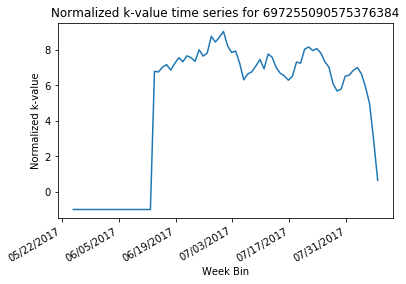

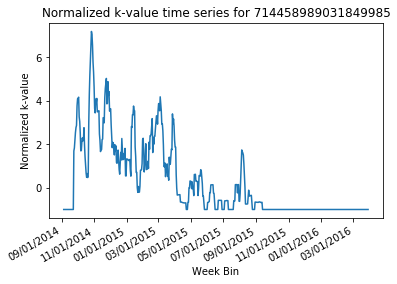

ValueError: x and y must have same first dimension, but have shapes (587,) and (586,)

In [29]:
for user in egolist[0:10]:
    ts = getUserTimeline(user,start_date,total_days)
    x,y = getNormalizedUserTimeline(ts,norm_base)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.plot(x,y)
    plt.gcf().autofmt_xdate()
    plt.title("Normalized k-value time series for %s"%str(user))
    plt.xlabel("Week Bin")
    plt.ylabel("Normalized k-value")
    plt.show()

Normalized with moving average

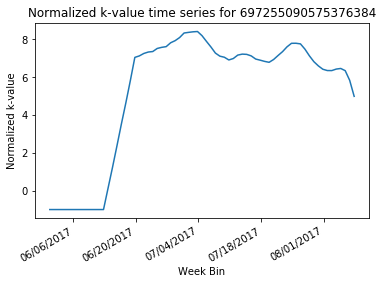

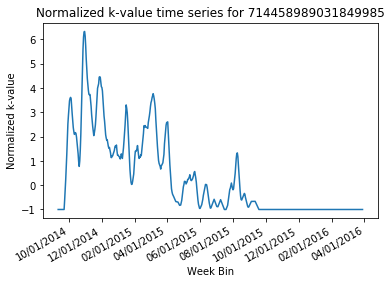

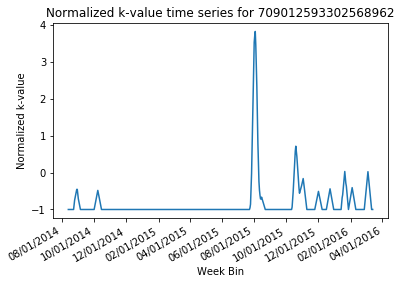

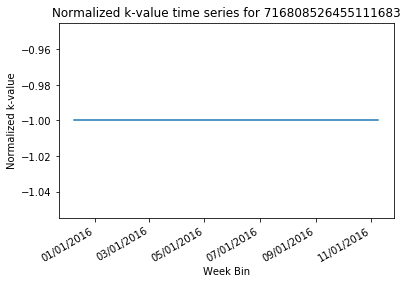

ValueError: ordinal must be >= 1

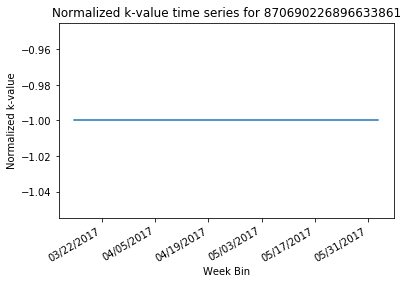

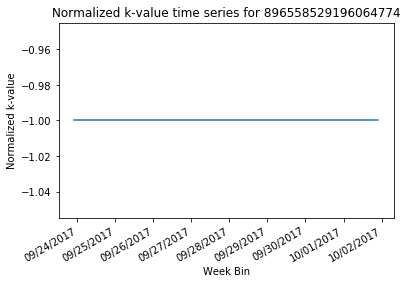

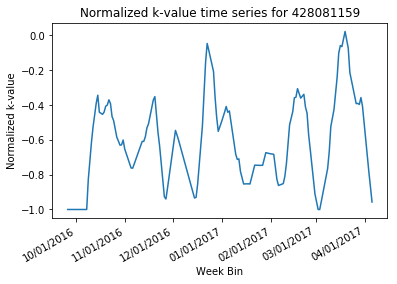

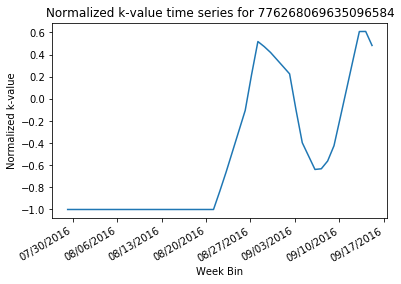

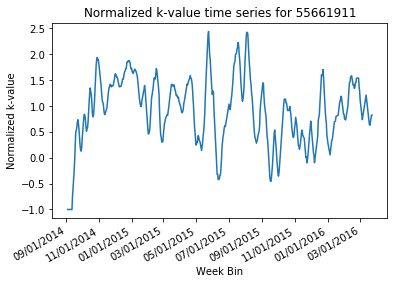

In [28]:
for user in egolist[0:10]:
    ts = getUserTimeline(user,start_date,total_days)
    x,y = getNormalizedUserTimeline(ts,norm_base)
    
    #ax = plt.subplot(1,1,1)
    #plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    result = movingAverage(y,7)
    plt.plot(x[0:len(result)],result)
    plt.gcf().autofmt_xdate()
    plt.title("Normalized k-value time series for %s"%str(user))
    plt.xlabel("Week Bin")
    plt.ylabel("Normalized k-value")
    plt.show()